# JemimaAP_06211640000022

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
#memanggil data sheet 1
data = pd.read_excel('tugas3.xlsx',sheet=1)

In [10]:
#menampilkan data
data.head(n=5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,type
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 15 columns):
age               300 non-null int64
workclass         300 non-null object
fnlwgt            300 non-null int64
education         300 non-null object
education-num     300 non-null int64
marital-status    300 non-null object
occupation        300 non-null object
relationship      300 non-null object
race              300 non-null object
sex               300 non-null object
capital-gain      300 non-null int64
capital-loss      300 non-null int64
hours-per-week    300 non-null int64
native-country    300 non-null object
type              300 non-null object
dtypes: int64(6), object(9)
memory usage: 35.2+ KB


In [25]:
data = data.replace(' ?', np.nan)

In [31]:
data['sex'].value_counts()

 Male      198
 Female    102
Name: sex, dtype: int64

In [30]:
data['race'].value_counts()

 White                 242
 Black                  39
 Asian-Pac-Islander     15
 Amer-Indian-Eskimo      3
 Other                   1
Name: race, dtype: int64

In [29]:
#menghitung missing value
data.isnull().sum() 

age                0
workclass         16
fnlwgt             0
education          0
education-num      0
marital-status     0
occupation        16
relationship       0
race               0
sex                0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     7
type               0
dtype: int64

In [32]:
#menghitung jumlah missing value
data.isnull().sum().sum() 

39

In [33]:
#memisahkan kolom
Y = ['type']
X_int = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
X_cat = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']

In [34]:
data_Y = data[Y]
data_int = data[X_int].astype(float)
data_cat = data[X_cat]

In [35]:
#melihat kategori dari type
print(data_Y['type'].unique())

[' <=50K' ' >50K']


In [37]:
#mengganti missing value
data_int_array = []
data_cat_array = []
for type_name in data_Y['type'].unique():
    data_int_1 = data_int[data_Y['type']==type_name]
    data_int_clean_1 = data_int_1.fillna(data_int_1.mean().astype(int))
    data_int_array.append(data_int_clean_1)
    
    data_cat_1 = data_cat[data_Y['type']==type_name]
    data_cat_clean_1 = data_cat_1.where(pd.notnull(data_cat_1), data_cat_1.mode(), axis='columns')
    data_cat_array.append(data_cat_clean_1)

In [39]:
data_int_clean = pd.concat(data_int_array)
data_cat_clean = pd.concat(data_cat_array)

In [43]:
#mengecek ulang apakah masih ada missing value atau tidak
data_int_clean.isnull().sum().sum() 
data_cat_clean.isnull().sum().sum() 

0

In [62]:
#data baru
data_new = pd.concat([data_int_clean, data_cat_clean, data_Y], axis=1)

In [63]:
#standardize
from sklearn.preprocessing import StandardScaler

In [64]:
data_new['fnlwgt'] = StandardScaler().fit(data[['fnlwgt']]).transform(data[['fnlwgt']])
data_new['education-num'] = StandardScaler().fit(data[['education-num']]).transform(data[['education-num']])
data_new['capital-gain'] = StandardScaler().fit(data[['capital-gain']]).transform(data[['capital-gain']])
data_new['capital-loss'] = StandardScaler().fit(data[['capital-loss']]).transform(data[['capital-loss']])
data_new['hours-per-week'] = StandardScaler().fit(data[['hours-per-week']]).transform(data[['hours-per-week']])

In [65]:
data_new.head(4)

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass,education,marital-status,occupation,relationship,race,sex,native-country,type
0,39.0,0.0,1.038927,3.246300,-0.245093,0.0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,50.0,0.0,1.038927,-0.308043,-0.245093,0.0,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,38.0,0.0,-0.452356,-0.308043,-0.245093,0.0,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,53.0,0.0,-1.197997,-0.308043,-0.245093,0.0,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K


In [68]:
#deteksi outlier #bikin plot
plt.rcParams['figure.figsize'] = (15.0, 10.0)

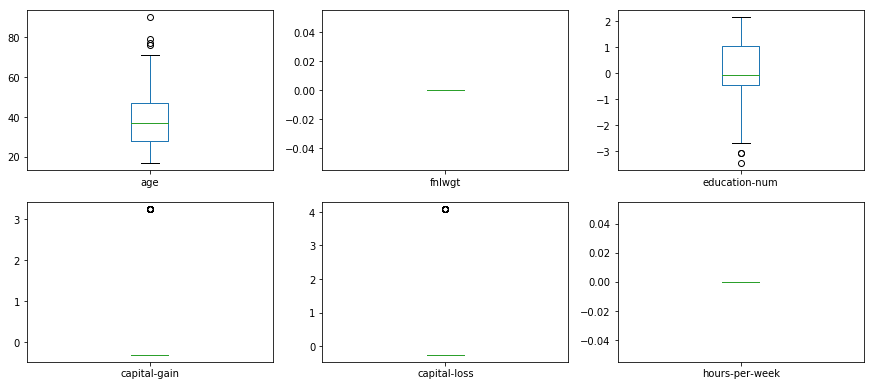

In [70]:
# Box Plots
data_new.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False)
plt.show()

In [79]:
data_cleaned = pd.concat([data_new, data_cat_clean], axis=1)

In [80]:
# rearrange columns position to default
data_cleaned = data_cleaned[column]

NameError: name 'column' is not defined

In [ ]:
data_cleaned.to_excel('tugas3.xlsx', index=0)